# Consolidando dados e calculando Outliers

In [ ]:
import os
import csv

# Caminho para a pasta que contém os arquivos CSV

#Aqui é preciso importar os dados dentro do Collab caso queriam testar
pasta_csv = 'C:/Users/luish/OneDrive/Área de Trabalho/FIAP Projetos/FASE 5/ASSETS_PBL_FIAP_ON_1TSC_FASE_5'

# Lista para armazenar as linhas de todos os arquivos CSV
linhas_combinadas = []

# Iterar sobre os arquivos na pasta
for arquivo in os.listdir(pasta_csv):
    if arquivo.endswith('.csv'):
        caminho_arquivo = os.path.join(pasta_csv, arquivo)
        with open(caminho_arquivo, 'r', newline='', encoding='latin1') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            linhas = list(leitor_csv)
            if linhas_combinadas:
                linhas_combinadas.extend(linhas[1:])
            else:
                linhas_combinadas.extend(linhas)

# Salvar as linhas combinadas em um novo arquivo CSV
caminho_saida = 'resultado_final.csv'
with open(caminho_saida, 'w', newline='', encoding='latin1') as arquivo_saida:
    escritor_csv = csv.writer(arquivo_saida)
    escritor_csv.writerows(linhas_combinadas)

print("Arquivo CSV final gerado com sucesso.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')
arquivo = "resultado_final.csv"


try:
    df = pd.read_csv(arquivo, encoding='latin-1', error_bad_lines=False, delimiter=';')
except pd.errors.ParserError as e:
    print(f"Erro na leitura do arquivo CSV: {e}")


if 'df' in locals():
    df.info()


In [ ]:
df.head

In [13]:
#GERANDO UM CSV COM OS OUTLIERS

import pandas as pd
import numpy as np

df['quantidade'] = pd.to_numeric(df['quantidade'], errors='coerce', downcast='integer')

# Passo 1: Calcule o IQR (Intervalo Interquartil)
Q1 = df['quantidade'].quantile(0.25)
Q3 = df['quantidade'].quantile(0.75)
IQR = Q3 - Q1

# Passo 2: Defina limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Passo 3: Identifique os outliers
outliers = df[(df['quantidade'] < limite_inferior) | (df['quantidade'] > limite_superior)]

outliers.to_csv('Outliers.csv', index=False)


In [60]:
#GERANDO UM CSV SEM OS OUTLIERS

import pandas as pd
import numpy as np

df['quantidade'] = pd.to_numeric(df['quantidade'], errors='coerce', downcast='integer')

# Passo 1: Calcule o IQR (Intervalo Interquartil)
Q1 = df['quantidade'].quantile(0.25)
Q3 = df['quantidade'].quantile(0.75)
IQR = Q3 - Q1

# Passo 2: Defina limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Passo 3: Identifique os outliers
outliers = df[(df['quantidade'] < limite_inferior) | (df['quantidade'] > limite_superior)]

# Crie um novo DataFrame excluindo os outliers
df_sem_outliers = df[~df.index.isin(outliers.index)]

# Agora, df_sem_outliers contém a planilha original excluindo os outliers
df_sem_outliers.to_csv('Sem_Outliers.csv', index=False)


In [62]:
#CALCULANDO MEDIDAS DE VARIABILIDADE SEM OUTLIERS

import pandas as pd
import numpy as np

# Carregue o DataFrame original
arquivo = "Sem_Outliers.csv"  # Substitua pelo nome do seu arquivo original

# Agora, calcule estimativas de variabilidade sem considerar outliers
media_sem_outliers = df_sem_outliers['quantidade'].mean()
mediana_sem_outliers = df_sem_outliers['quantidade'].median()
desvio_padrao_sem_outliers = df_sem_outliers['quantidade'].std()
variancia_sem_outliers = df_sem_outliers['quantidade'].var()
iqr_sem_outliers = df_sem_outliers['quantidade'].quantile(0.75) - df_sem_outliers['quantidade'].quantile(0.25)

# Imprima as estimativas de variabilidade
print("Média sem outliers:", media_sem_outliers)
print("Mediana sem outliers:", mediana_sem_outliers)
print("Desvio Padrão sem outliers:", desvio_padrao_sem_outliers)
print("Variância sem outliers:", variancia_sem_outliers)
print("IQR (Intervalo Interquartil) sem outliers:", iqr_sem_outliers)


Média sem outliers: 1.5779035777076404
Mediana sem outliers: 1.0
Desvio Padrão sem outliers: 0.7752935565710629
Variância sem outliers: 0.6010800988606079
IQR (Intervalo Interquartil) sem outliers: 1.0


## Análise dos Outliers

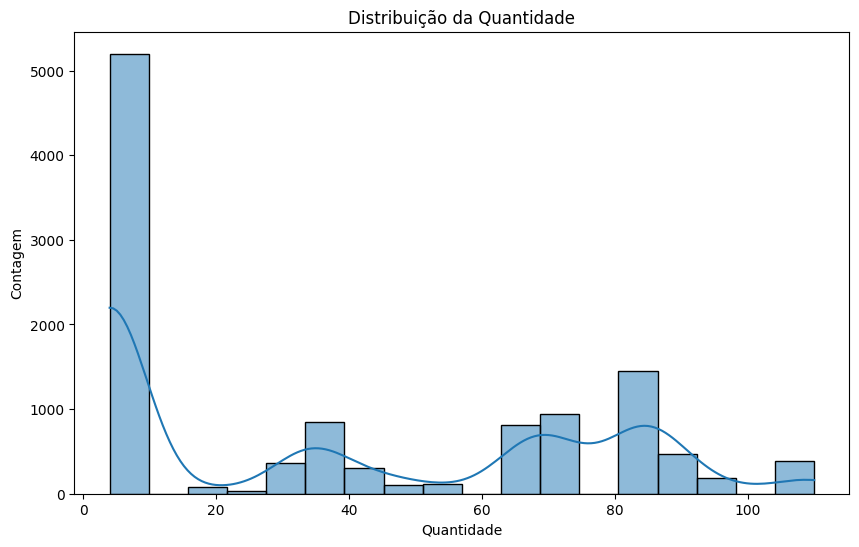

In [22]:
warnings.filterwarnings('ignore')
arquivo = "Outliers.csv"


try:
    df = pd.read_csv(arquivo, encoding='latin-1', error_bad_lines=False, delimiter=',')
except pd.errors.ParserError as e:
    print(f"Erro na leitura do arquivo CSV: {e}")

if 'df' in locals():
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Histograma da coluna 'quantidade'
    plt.figure(figsize=(10, 6))
    sns.histplot(df['quantidade'], kde=True)
    plt.title('Distribuição da Quantidade')
    plt.xlabel('Quantidade')
    plt.ylabel('Contagem')
    plt.show()


In [45]:
warnings.filterwarnings('ignore')
arquivo = "Outliers.csv"


try:
    df = pd.read_csv(arquivo, encoding='latin-1', error_bad_lines=False, delimiter=',')
except pd.errors.ParserError as e:
    print(f"Erro na leitura do arquivo CSV: {e}")

if 'df' in locals():
  # Exemplo de segmentação por região
  segmented_data = df.groupby('regiao_pais')['quantidade'].mean()
  pd.DataFrame(segmented_data)

segmented_data

regiao_pais
Centro Oeste    34.918537
Nordeste        43.491833
Norte           42.147281
Sudeste         32.901627
Sul             37.647973
Name: quantidade, dtype: float64

In [47]:
warnings.filterwarnings('ignore')
arquivo = "Outliers.csv"


try:
    df = pd.read_csv(arquivo, encoding='latin-1', error_bad_lines=False, delimiter=',')
except pd.errors.ParserError as e:
    print(f"Erro na leitura do arquivo CSV: {e}")

if 'df' in locals():
  # Resumo estatístico das colunas numéricas
  summary = df[['valor', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']].describe()
  pd.DataFrame(summary)

summary



,valor,valor_total_bruto,valor_comissao,lucro_liquido
count,11283,11283,11283,11283
unique,783,2826,2670,3123
top,"21,28","85,12","1,52","30,4"
freq,458,404,1266,1281


In [54]:
warnings.filterwarnings('ignore')
arquivo = "Outliers.csv"

try:
    df = pd.read_csv(arquivo, encoding='latin-1', error_bad_lines=False, delimiter=',')
except pd.errors.ParserError as e:
    print(f"Erro na leitura do arquivo CSV: {e}")

if 'df' in locals():
  # Exemplo de segmentação por região
  segmented_data = df.groupby('formapagto')['quantidade'].mean()
  segmented_data = segmented_data.sort_values(ascending=True)
  pd.DataFrame(segmented_data)

segmented_data

formapagto
Dinheiro            36.949624
Boleto BancÃ¡rio    38.297760
Pix                 38.570659
Cartao DÃ©bito      38.811877
Cartao CrÃ©dito     39.086090
Name: quantidade, dtype: float64

**Análise**

dddd